# <center>COMP 562 Final Project</center>
## <center>By: Elise Dixon</center>

    Data Exploration and Machine Learning Analysis of mental health dataset gathered by Open Sourcing Mental Illness(OSMI) through their Mental Health in Tech Survey. This survey was gathered in the year 2016 with over 1400 entries. This notebook will look into the question of whether a person will seek treatment taking into consideration different life factors.

### Setup

In [278]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn import preprocessing
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline

### Load Data

In [280]:
train_df=pd.read_csv('mental-health-in-tech-2016/mental-health-in-tech-2016_cleaned.csv')
train_df.head()

,self_employed,num_employees,tech_company,role,mental_health_benefits,knowledge_of_mental_healthcare_coverage,employer_discussed_mental_health,employer_offer_resources,anonymity_protected,asking_for_leave,...,bad_response_to_mental_health_at_work,family_history,had_disorder_in_past,have_disorder,been_diagnosed,sought_treatment,interferes_with_work_if_treated_effectively,age,gender,work_remotely
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,No,No,Yes,No,Yes,0,Not applicable to me,39,Male,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,No,Yes,Yes,Yes,Yes,1,Rarely,29,male,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,38,Male,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,Yes,Yes,1,Sometimes,43,male,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,"Yes, I experienced",Yes,Yes,Yes,Yes,1,Sometimes,43,Female,Sometimes


In [281]:
features=(list(train_df))
print(len(features))
train_df.shape

37


(1433, 37)

### Clean Data
We will first remove entries that null then standardize the data

In [282]:
# look for unanswered questions -> indicates missing data
num_missing = train_df.isnull().sum().sort_values(ascending=False)
percent_missing = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([num_missing, percent_missing], axis=1, keys=['Number Missing', 'Percent Missing'])
missing_data.head(20)
print(missing_data)

                                                    Number Missing  \
negative_impact_of_revealing_diagnosis                        1289   
percentage_work_time_affected                                 1229   
role                                                          1170   
reveal_diagnosis_with_collegues                               1146   
medical_coverage                                              1146   
know_of_resources_for_help                                    1146   
productivity_affected_mental_health                           1146   
knowledge_of_mental_healthcare_coverage                        420   
discuss_mental_health_disorder_with_employer                   287   
negative_consequences_at_work                                  287   
discuss_mental_health_disorder_with_coworkers                  287   
believe_negative_consequences_of_employer_discu...             287   
asking_for_leave                                               287   
discuss_mental_healt

In [283]:
# remove significantly unanswered questions -> state and comments
count=0
not_answered=[]
for col in features:
    if(sum(pd.isnull(train_df[col]))>500):
        count=count+1
        not_answered.append(col)
print(not_answered)
train_df.drop([i for i in not_answered],axis=1,inplace=True)

['role', 'medical_coverage', 'know_of_resources_for_help', 'reveal_diagnosis_with_collegues', 'negative_impact_of_revealing_diagnosis', 'productivity_affected_mental_health', 'percentage_work_time_affected']


In [284]:
# check remaining missing data
num_missing = train_df.isnull().sum().sort_values(ascending=False)
percent_missing = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data_2 = pd.concat([num_missing, percent_missing], axis=1, keys=['Number Missing', 'Percent Missing'])
missing_data_2.head(20)
print(missing_data_2)

                                                    Number Missing  \
knowledge_of_mental_healthcare_coverage                        420   
negative_consequences_at_work                                  287   
employer_mental_health_serious                                 287   
num_employees                                                  287   
tech_company                                                   287   
mental_health_benefits                                         287   
employer_discussed_mental_health                               287   
employer_offer_resources                                       287   
anonymity_protected                                            287   
asking_for_leave                                               287   
discuss_mental_health_disorder_with_employer                   287   
believe_negative_consequences_of_employer_discu...             287   
discuss_mental_health_disorder_with_coworkers                  287   
discuss_mental_healt

In [285]:
# remove NaN from self_employed
count=0

for index,col in enumerate(list(train_df)):
    is_null=train_df.index[train_df[col].isnull()]
    if(len(is_null)==287):
        k=is_null
        count+=1

train_df.drop(k,inplace=True)

train_df.shape

(1146, 30)

In [286]:
# Similar to above, we will remove the common rows with null entries
count=0

for index,col in enumerate(list(train_df)):
    is_null=train_df.index[train_df[col].isnull()]
    if(len(is_null)==133):
        k=is_null
        count+=1

train_df.drop(k,inplace=True)

train_df.shape

(1013, 30)

In [289]:
# check remaining missing data
num_missing = train_df.isnull().sum().sort_values(ascending=False)
percent_missing = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data_3 = pd.concat([num_missing, percent_missing], axis=1, keys=['Number Missing', 'Percent Missing'])
missing_data_3.head(20)
print(missing_data_3)

                                                    Number Missing  \
bad_response_to_mental_health_at_work                           45   
gender                                                           2   
work_remotely                                                    0   
employer_mental_health_serious                                   0   
num_employees                                                    0   
tech_company                                                     0   
mental_health_benefits                                           0   
knowledge_of_mental_healthcare_coverage                          0   
employer_discussed_mental_health                                 0   
employer_offer_resources                                         0   
anonymity_protected                                              0   
asking_for_leave                                                 0   
discuss_mental_health_disorder_with_employer                     0   
believe_negative_con

In [290]:
# Last entry removable
count=0

for index,col in enumerate(list(train_df)):
    is_null=train_df.index[train_df[col].isnull()]
    if(len(is_null)==45):
        k=is_null
        count+=1

train_df.drop(k,inplace=True)

train_df.shape

(968, 30)

In [291]:
# Last entry removable
count=0

for index,col in enumerate(list(train_df)):
    is_null=train_df.index[train_df[col].isnull()]
    if(len(is_null)==2):
        k=is_null
        count+=1

train_df.drop(k,inplace=True)

train_df.shape

(966, 30)

In [292]:
#check number of null entries
train_df.isnull().sum().max()

0

In [293]:
# Look at the gender column for entry types
train_df['gender'].unique()

array(['male', 'Female', 'Male', 'M', 'female', 'm',
       'I identify as female.', 'non-binary', 'Female assigned at birth ',
       'F', 'Woman', 'man', 'Male ', 'fm', 'f', 'Cis female ',
       'Transitioned, M2F', 'Genderfluid (born female)',
       'Female or Multi-Gender Femme', 'female/woman', 'Cis male',
       'Male.', 'Androgynous', 'Male (cis)', 'Other', 'Female ',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'genderqueer woman', 'female ', 'Dude',
       'woman', 'mail', 'Male/genderqueer', 'fem', 'male ',
       'Female (props for making this a freeform field, though)',
       ' Female', 'Cis Male', 'Cis-woman', 'Genderqueer', 'cisdude',
       'Genderflux demi-girl', 'cis man', 'Transgender woman'],
      dtype=object)

In [294]:
# Sort the responses to their appropriate section. Move into groups: Male, Female, Genderqueer&Other
train_df['gender'] = train_df['gender'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Dude',
    'mail', 'M|', 'male ', 'Cis Male',
    'cisdude', 'cis man'], 'Male')

train_df['gender'] = train_df['gender'].replace([
    'Female', 'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'Transgender woman',
    'Cis female '], 'Female')

train_df['gender'] = train_df['gender'].replace([
    'Bigender', 'non-binary,','non-binary', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')

In [295]:
train_df['gender'].value_counts()

Male                 710
Female               239
Genderqueer/Other     17
Name: gender, dtype: int64

In [296]:
# Look at the age column for entry types
train_df['age'].unique()

array([ 29,  43,  42,  30,  37,  44,  28,  34,  35,  52,  32,  31,  25,
        33,  27,  36,  40,  46,  41,  45,  38,  21,  24,  26,  23,  39,
        51,  55,  22,  49,  20,  54,  47,  56,  50,  99,  57,  61,  19,
       323,  48,  62,  53,  58,   3,  66,  59,  63,  74,  70])

In [297]:
# set the anomoly ages to the mean -> 3, 99, 323
mean_age = math.floor(train_df['age'].mean())

train_df.loc[(train_df['age'] > 80), 'age'] = mean_age
train_df.loc[(train_df['age'] < 5), 'age'] = mean_age

In [298]:
train_df.head()

,self_employed,num_employees,tech_company,mental_health_benefits,knowledge_of_mental_healthcare_coverage,employer_discussed_mental_health,employer_offer_resources,anonymity_protected,asking_for_leave,discuss_mental_health_disorder_with_employer,...,bad_response_to_mental_health_at_work,family_history,had_disorder_in_past,have_disorder,been_diagnosed,sought_treatment,interferes_with_work_if_treated_effectively,age,gender,work_remotely
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,No,Yes,Yes,Yes,Yes,1,Rarely,29,Male,Never
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,"Yes, I experienced",Yes,Yes,Yes,Yes,1,Sometimes,43,Female,Sometimes
5,0,More than 1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,"Yes, I experienced",No,No,Yes,No,1,Not applicable to me,42,Male,Sometimes
6,0,26-100,1.0,I don't know,No,No,No,I don't know,Somewhat easy,No,...,No,No,No,No,No,0,Not applicable to me,30,Male,Sometimes
7,0,More than 1000,1.0,Yes,Yes,No,Yes,Yes,Very easy,No,...,"Yes, I observed",Yes,Yes,Yes,Yes,1,Sometimes,37,Female,Always


### Encode Data

In [300]:
dictionary = {}
for feature in train_df:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(train_df[feature])
    encoder_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    train_df[feature] = encoder.transform(train_df[feature])
    label = [*encoder_dict]
    dictionary[feature] = label
    
for key, value in dictionary.items():     
    print(key, value)

num_employees ['26-100', 'More than 1000', '500-1000', '100-500', '1-5', '6-25']
have_disorder ['Yes', 'No', 'Maybe']
believe_negative_consequences_of_employer_discussion ['Yes', 'No', 'Maybe']
work_remotely ['Never', 'Always', 'Sometimes']
employer_mental_health_serious ['Yes', 'No', "I don't know"]
tech_company [0.0, 1.0]
gender ['Genderqueer/Other', 'Female', 'Male']
discuss_mental_health_potential_employer ['Yes', 'No', 'Maybe']
anonymity_protected ['Yes', 'No', "I don't know"]
hurt_career ['Yes, it has', 'No, it has not', "No, I don't think it would", 'Maybe', 'Yes, I think it would']
discuss_mental_health_disorder_with_coworkers ['Yes', 'No', 'Maybe']
discuss_mental_health_disorder_with_employer ['Yes', 'No', 'Maybe']
had_disorder_in_past ['Yes', 'No', 'Maybe']
negative_consequences_at_work ['Yes', 'No']
been_diagnosed ['Yes', 'No']
family_history ['Yes', 'No', "I don't know"]
bad_response_to_mental_health_at_work ['No', 'Yes, I experienced', 'Maybe/Not sure', 'Yes, I observed']


In [301]:
train_df.head()

,self_employed,num_employees,tech_company,mental_health_benefits,knowledge_of_mental_healthcare_coverage,employer_discussed_mental_health,employer_offer_resources,anonymity_protected,asking_for_leave,discuss_mental_health_disorder_with_employer,...,bad_response_to_mental_health_at_work,family_history,had_disorder_in_past,have_disorder,been_diagnosed,sought_treatment,interferes_with_work_if_treated_effectively,age,gender,work_remotely
1,0,4,1,1,2,2,2,2,3,1,...,1,2,2,2,1,1,3,10,2,1
4,0,4,0,3,2,1,1,1,1,2,...,2,2,2,2,1,1,4,24,0,2
5,0,5,1,3,0,1,2,2,3,2,...,2,1,1,2,0,1,1,23,2,2
6,0,2,1,0,1,1,1,0,3,1,...,1,1,1,1,0,0,1,11,2,2
7,0,5,1,3,2,1,2,2,5,1,...,3,2,2,2,1,1,4,18,0,0


### Scale Data

In [302]:
scaler = MinMaxScaler()
for i in range(len(list(train_df))):
    train_df[(list(train_df)[i])] = scaler.fit_transform(train_df[[(list(train_df)[i])]])

train_df.head()

,self_employed,num_employees,tech_company,mental_health_benefits,knowledge_of_mental_healthcare_coverage,employer_discussed_mental_health,employer_offer_resources,anonymity_protected,asking_for_leave,discuss_mental_health_disorder_with_employer,...,bad_response_to_mental_health_at_work,family_history,had_disorder_in_past,have_disorder,been_diagnosed,sought_treatment,interferes_with_work_if_treated_effectively,age,gender,work_remotely
1,0.0,0.8,1.0,0.333333,1.0,1.0,1.0,1.0,0.6,0.5,...,0.333333,1.0,1.0,1.0,1.0,1.0,0.75,0.217391,1.0,0.5
4,0.0,0.8,0.0,1.000000,1.0,0.5,0.5,0.5,0.2,1.0,...,0.666667,1.0,1.0,1.0,1.0,1.0,1.00,0.521739,0.0,1.0
5,0.0,1.0,1.0,1.000000,0.0,0.5,1.0,1.0,0.6,1.0,...,0.666667,0.5,0.5,1.0,0.0,1.0,0.25,0.500000,1.0,1.0
6,0.0,0.4,1.0,0.000000,0.5,0.5,0.5,0.0,0.6,0.5,...,0.333333,0.5,0.5,0.5,0.0,0.0,0.25,0.239130,1.0,1.0
7,0.0,1.0,1.0,1.000000,1.0,0.5,1.0,1.0,1.0,0.5,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.00,0.391304,0.0,0.0


### Data Visualizations

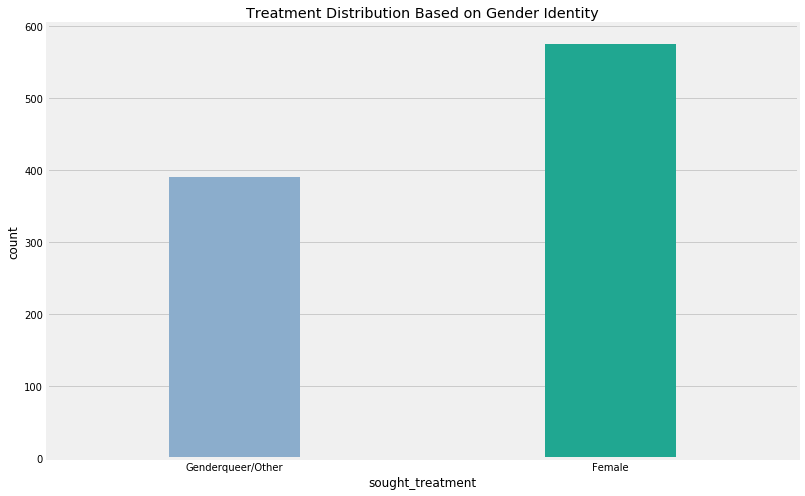

In [337]:
import seaborn as sns
plt.figure(figsize=(12,8))
labels = dictionary['gender']
g = sns.countplot(x='sought_treatment', data=train_df, palette=sns.color_palette(['#80add7', '#0abda0']))
g.set_xticklabels(labels)

def change_width(g, new_value) :
    for patch in g.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .35)

plt.title('Treatment Distribution Based on Gender Identity')
plt.show()

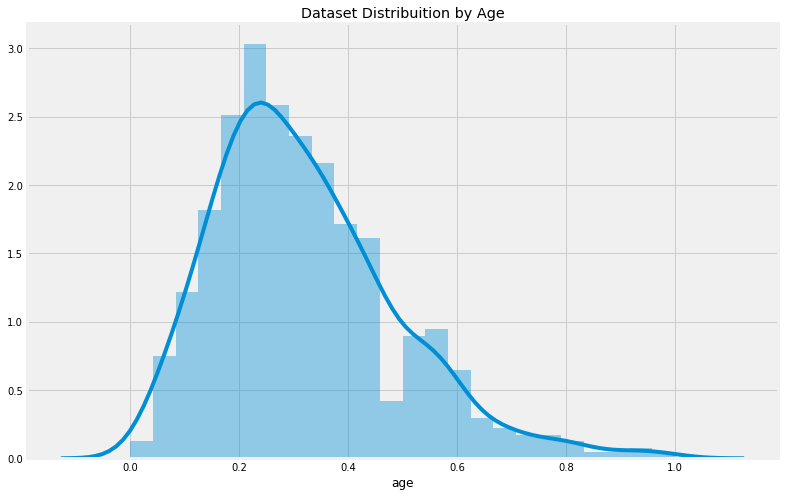

In [326]:
plt.figure(figsize=(12,8))
sns.distplot(train_df['age'],bins=24)
plt.title('Dataset Distribuition by Age')
plt.xlabel('age')
plt.show()

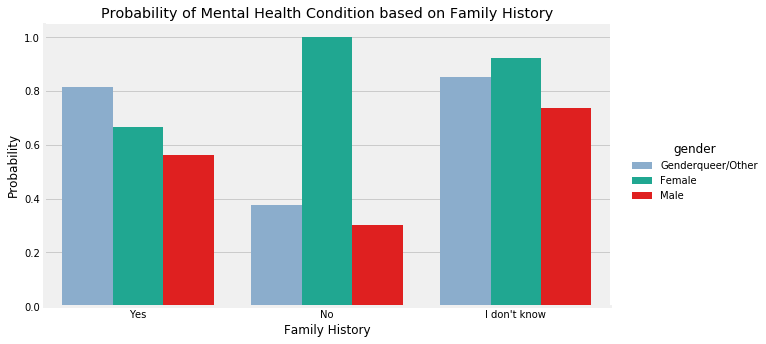

In [332]:
o = dictionary['family_history']
g = sns.catplot(x="family_history", y="sought_treatment", hue="gender", data=train_df, 
                kind="bar", ci=None, height=5, aspect=2, legend_out = True, palette=sns.color_palette(['#80add7', '#0abda0', 'red']))
g.set_xticklabels(o)
plt.title('Probability of Mental Health Condition based on Family History')
plt.ylabel('Probability')
plt.xlabel('Family History')

# replace legend labels
new_labels = dictionary['gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

### Models

#### Random Forest Tree

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [228]:
target=train_df['sought_treatment']
train_df.drop(['sought_treatment'],axis=1,inplace=True)

In [229]:
X=train_df
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)

In [230]:
random_forest_model = RandomForestClassifier(max_depth=14, random_state=0)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [348]:
def model_analysis(y_test, x_test, modelname, title):
    model_predict = modelname.predict(x_test)
    c_matrix = confusion_matrix(y_test, model_predict)
                            
    false_p = c_matrix[0,1]
    false_n = c_matrix[1,0]
    true_p = c_matrix[0,0]
    true_n = c_matrix[1,1]
    
    class_names=[0,1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(title+' Confusion Matrix', y=1.1)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')

    true_positive_rate = true_p/(true_p+false_n)
    true_negative_rate = true_n/(true_n+false_p) 
    false_positive_rate = false_p/(false_p+true_n)
    false_negative_rate  = false_n/(true_p+false_n)
    
    print(title+' Results', '\n')
    print("======= Confusion Matrix =======")
    print(confusion_matrix(y_test, model_predict), '\n')
    print("======= Classification Report =======")
    print(classification_report(y_test, model_predict), '\n')
    print("======= Accuracy =======")
    print('True Positive Rate: ', true_positive_rate)
    print('True Negative Rate: ', true_negative_rate)
    print('False Positive Rate: ', false_positive_rate)
    print('False Negative Rate: ', false_negative_rate )
    print('AUC Score:', metrics.roc_auc_score(y_test, model_predict))
    print('Mean Accuracy: ', modelname.score(x_test,y_test))
    


Random Forest Tree Results 

======= Confusion Matrix =======
[[ 52  14]
 [ 11 117]] 

======= Classification Report =======
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        66
           1       0.89      0.91      0.90       128

    accuracy                           0.87       194
   macro avg       0.86      0.85      0.85       194
weighted avg       0.87      0.87      0.87       194
 

======= Accuracy =======
True Positive Rate:  0.8253968253968254
True Negative Rate:  0.8931297709923665
False Positive Rate:  0.10687022900763359
False Negative Rate:  0.1746031746031746
AUC Score: 0.8509706439393939
Mean Accuracy:  0.8711340206185567


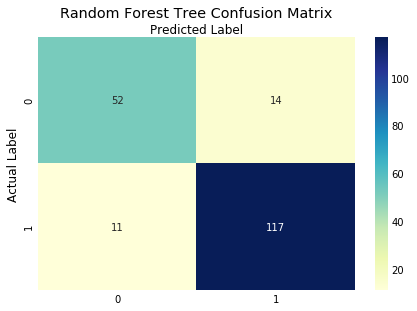

In [349]:
model_analysis(y_test, X_test, random_forest_model, 'Random Forest Tree')

#### Logistic Regression

In [350]:
from sklearn.linear_model import LogisticRegression

In [351]:
# train a logistic regression model on the training set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression Results 

======= Confusion Matrix =======
[[ 56  10]
 [ 15 113]] 

======= Classification Report =======
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        66
           1       0.92      0.88      0.90       128

    accuracy                           0.87       194
   macro avg       0.85      0.87      0.86       194
weighted avg       0.87      0.87      0.87       194
 

======= Accuracy =======
True Positive Rate:  0.7887323943661971
True Negative Rate:  0.9186991869918699
False Positive Rate:  0.08130081300813008
False Negative Rate:  0.2112676056338028
AUC Score: 0.8656486742424243
Mean Accuracy:  0.8711340206185567


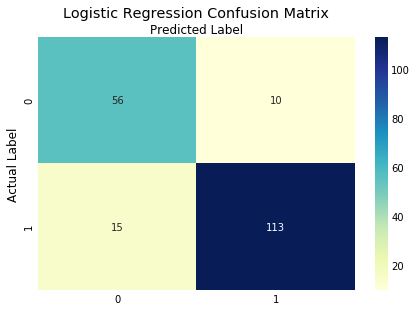

In [352]:
model_analysis(y_test, X_test, log_reg, 'Logistic Regression')

#### Support Vector Machine (SVM)

In [354]:
from sklearn.datasets import make_blobs 
from sklearn.svm import SVC 

In [355]:
svm_model = SVC(kernel='linear') 

In [356]:
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Support Vector Machine Results 

======= Confusion Matrix =======
[[ 59   7]
 [ 21 107]] 

======= Classification Report =======
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        66
           1       0.94      0.84      0.88       128

    accuracy                           0.86       194
   macro avg       0.84      0.86      0.85       194
weighted avg       0.87      0.86      0.86       194
 

======= Accuracy =======
True Positive Rate:  0.7375
True Negative Rate:  0.9385964912280702
False Positive Rate:  0.06140350877192982
False Negative Rate:  0.2625
AUC Score: 0.8649384469696969
Mean Accuracy:  0.8556701030927835


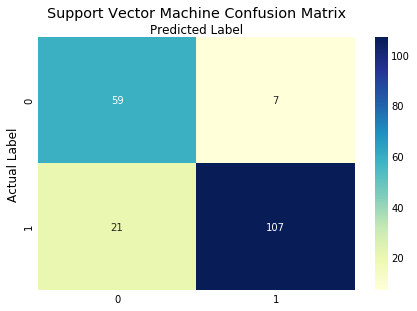

In [357]:
model_analysis(y_test, X_test, svm_model, 'Support Vector Machine')

#### Gaussian Naive Bayes

In [358]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

In [359]:
gnb = GaussianNB()

In [360]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Gaussian Naive Bayes Results 

======= Confusion Matrix =======
[[ 54  12]
 [ 14 114]] 

======= Classification Report =======
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        66
           1       0.90      0.89      0.90       128

    accuracy                           0.87       194
   macro avg       0.85      0.85      0.85       194
weighted avg       0.87      0.87      0.87       194
 

======= Accuracy =======
True Positive Rate:  0.7941176470588235
True Negative Rate:  0.9047619047619048
False Positive Rate:  0.09523809523809523
False Negative Rate:  0.20588235294117646
AUC Score: 0.854403409090909
Mean Accuracy:  0.865979381443299


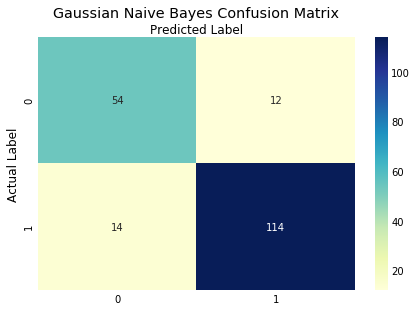

In [361]:
model_analysis(y_test, X_test, gnb, 'Gaussian Naive Bayes')

#### XGBoost

In [362]:
from xgboost import XGBClassifier

In [363]:
xgboost = XGBClassifier()

In [364]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBoost Results 

======= Confusion Matrix =======
[[ 53  13]
 [  9 119]] 

======= Classification Report =======
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        66
           1       0.90      0.93      0.92       128

    accuracy                           0.89       194
   macro avg       0.88      0.87      0.87       194
weighted avg       0.89      0.89      0.89       194
 

======= Accuracy =======
True Positive Rate:  0.8548387096774194
True Negative Rate:  0.9015151515151515
False Positive Rate:  0.09848484848484848
False Negative Rate:  0.14516129032258066
AUC Score: 0.8663589015151515
Mean Accuracy:  0.8865979381443299


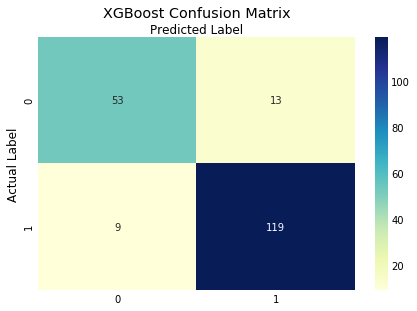

In [365]:
model_analysis(y_test, X_test, xgboost, 'XGBoost')